## Optuna

In [8]:
# Optuna hyperparamert optimization library 
import optuna

In [7]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r df
%store -r scaler
%store -r X_val
%store -r y_val
%store -r X_train_sc
%store -r X_val_sc

In [3]:
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (6399, 11)
Test data shape:  (2000, 11)


In [4]:
from collections import Counter


Counter(y_train)

Counter({0: 5095, 1: 1304})

In [1]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    mode='min',
    restore_best_weights=True,
    verbose=1

)



In [90]:
trial_metric = "Recall"
batch_size = 64

def create_model(trial):
    n_units1 = trial.suggest_int("n_units1", 8, 128) 
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 6, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=300,
        callbacks=[callback],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]

    return score


In [91]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 23:12:14,631] A new study created in memory with name: no-name-17276321-5556-459a-b068-b836ea6d92a3
C:\Users\hessa\AppData\Local\Temp\ipykernel_8976\1782540007.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
C:\Users\hessa\AppData\Local\Temp\ipykernel_8976\1782540007.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  w0 = trial.suggest_loguniform("w0", 0.01, 5)
C:\Users\hessa\AppData\Local\Temp\ipykernel_8976\1782540007.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

Restoring model weights from the end of the best epoch: 3.
Epoch 28: early stopping


[I 2023-10-30 23:12:22,460] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 127, 'n_units2': 93, 'n_units3': 123, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.3980696704448687e-05, 'w0': 2.1503112496628103, 'w1': 0.05220387432731642}. Best is trial 0 with value: 0.0.
[I 2023-10-30 23:13:40,816] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 83, 'n_units2': 44, 'n_units3': 120, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00041186032767626465, 'w0': 0.2732887087239401, 'w1': 0.5569053283184449}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 29.
Epoch 54: early stopping


[I 2023-10-30 23:13:52,786] Trial 2 finished with value: 0.33052146434783936 and parameters: {'n_units1': 76, 'n_units2': 35, 'n_units3': 64, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.035826038736531486, 'w0': 0.6358550345171224, 'w1': 0.019169654979225258}. Best is trial 2 with value: 0.33052146434783936.


Restoring model weights from the end of the best epoch: 46.
Epoch 71: early stopping


[I 2023-10-30 23:14:08,356] Trial 3 finished with value: 0.30444785952568054 and parameters: {'n_units1': 55, 'n_units2': 107, 'n_units3': 99, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.001655504207543851, 'w0': 0.4524112947310124, 'w1': 0.01485468446493371}. Best is trial 2 with value: 0.33052146434783936.


Restoring model weights from the end of the best epoch: 30.
Epoch 55: early stopping


[I 2023-10-30 23:14:19,873] Trial 4 finished with value: 0.6157975196838379 and parameters: {'n_units1': 76, 'n_units2': 10, 'n_units3': 66, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.02062085064563555, 'w0': 0.035662948846104096, 'w1': 0.12319589721493507}. Best is trial 4 with value: 0.6157975196838379.
[I 2023-10-30 23:15:09,627] Trial 5 finished with value: 0.6226993799209595 and parameters: {'n_units1': 67, 'n_units2': 76, 'n_units3': 75, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 7.072054063065082e-05, 'w0': 0.24875370743209782, 'w1': 0.870014216824594}. Best is trial 5 with value: 0.6226993799209595.


Restoring model weights from the end of the best epoch: 88.
Epoch 113: early stopping


[I 2023-10-30 23:15:30,400] Trial 6 finished with value: 0.8826687335968018 and parameters: {'n_units1': 113, 'n_units2': 40, 'n_units3': 62, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0001221734746921497, 'w0': 0.012890643352195917, 'w1': 0.11083352974445823}. Best is trial 6 with value: 0.8826687335968018.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 23:15:37,889] Trial 7 finished with value: 0.46932515501976013 and parameters: {'n_units1': 26, 'n_units2': 55, 'n_units3': 75, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.6419469420957336e-05, 'w0': 0.42808666322511846, 'w1': 3.5311918724862754}. Best is trial 6 with value: 0.8826687335968018.


Restoring model weights from the end of the best epoch: 19.
Epoch 44: early stopping


[I 2023-10-30 23:15:47,837] Trial 8 finished with value: 0.3358895778656006 and parameters: {'n_units1': 68, 'n_units2': 125, 'n_units3': 31, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0026084916803241105, 'w0': 0.20836370618437922, 'w1': 0.03701038499368605}. Best is trial 6 with value: 0.8826687335968018.


Restoring model weights from the end of the best epoch: 67.
Epoch 92: early stopping


[I 2023-10-30 23:16:07,788] Trial 9 finished with value: 0.21779140830039978 and parameters: {'n_units1': 123, 'n_units2': 72, 'n_units3': 86, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0001647152278800045, 'w0': 1.033540443690106, 'w1': 0.11749240138893659}. Best is trial 6 with value: 0.8826687335968018.


{'n_units1': 113,
 'n_units2': 40,
 'n_units3': 62,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 0.0001221734746921497,
 'w0': 0.012890643352195917,
 'w1': 0.11083352974445823}

In [92]:
# build model with optuna parameters
unit1, unit2, unit3,optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=300,
    callbacks=[callback],
    class_weight= {0: w0, 1:w1},
    verbose=1,
)

Epoch 1/300
100/100 [==============================] - 2s 4ms/step - loss: 0.0216 - recall: 0.9755 - val_loss: 0.8649 - val_recall: 1.0000
Epoch 2/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0203 - recall: 1.0000 - val_loss: 0.9416 - val_recall: 1.0000
Epoch 3/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0197 - recall: 1.0000 - val_loss: 0.9247 - val_recall: 1.0000
Epoch 4/300
100/100 [==============================] - 0s 3ms/step - loss: 0.0191 - recall: 1.0000 - val_loss: 0.8965 - val_recall: 0.9939
Epoch 5/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0186 - recall: 0.9686 - val_loss: 0.8983 - val_recall: 0.9509
Epoch 6/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0183 - recall: 0.9479 - val_loss: 0.8701 - val_recall: 0.9110
Epoch 7/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0180 - recall: 0.9287 - val_loss: 0.8432 - val_recall: 0.9049
Epoch 8/300
100/100 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [96]:
history = model.history.history

In [93]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = (model.predict(X_test) > 0.5)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1050  543]
 [  68  339]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1593
           1       0.38      0.83      0.53       407

    accuracy                           0.69      2000
   macro avg       0.66      0.75      0.65      2000
weighted avg       0.83      0.69      0.72      2000



63/63 [==============================] - 0s 1ms/step


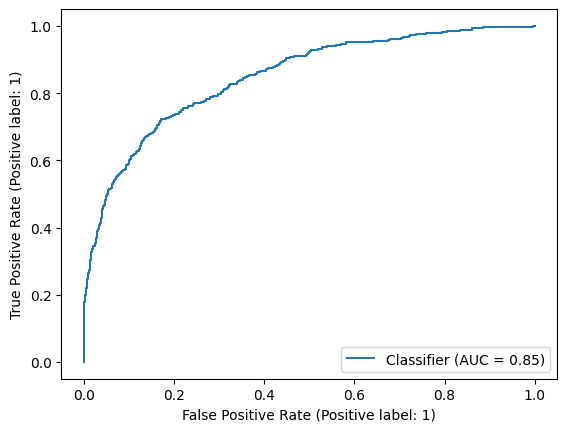

In [94]:
from sklearn.metrics import RocCurveDisplay


y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [98]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5733551979064941
recall:  0.8329238295555115


In [ ]:
## Final model

In [99]:
import pickle
%store -r df_con

In [105]:
pickle.dump(df_con, open("scaler_prediction", "wb"))
pickle.dump(scaler, open("scaler_churn", "wb"))

In [106]:
single_customer = df_con.drop(columns = "Exited").iloc[0]
single_customer

CreditScore                619
Age                         42
Tenure                       2
Balance                    0.0
NumOfProducts                1
HasCrCard                    1
IsActiveMember               1
EstimatedSalary      101348.88
Geography_Germany        False
Geography_Spain          False
Gender_Male              False
Name: 0, dtype: object

In [102]:
study.best_params

{'n_units1': 113,
 'n_units2': 40,
 'n_units3': 62,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 0.0001221734746921497,
 'w0': 0.012890643352195917,
 'w1': 0.11083352974445823}

In [17]:
model.save("model_churn.h5")

In [111]:
from tensorflow.keras.models import load_model


In [113]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

c:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [114]:
model.predict(single_customer)  


1/1 [==============================] - 0s 130ms/step


array([[0.7244962]], dtype=float32)

In [115]:
df["Exited"].iloc[0]


1

In [ ]:

# import numpy as np


# y_test = y_test.values.reshape(-1,1)
# np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 0]], dtype=int64)